<a href="https://colab.research.google.com/github/TheoLpr/NLI_study/blob/main/Comparaison_Multitask_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importations and preprocess part


In [ ]:
!pip3 install -q --upgrade datasets

!pip3 install -q --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.1 MB/s eta 0:00:00


In [ ]:
import datasets
data = datasets.load_dataset("snli")
data = data.rename_column("label", "labels")

test_data = data["test"].filter(lambda _ex: _ex["labels"] != -1)


Downloading:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Filter:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch
import transformers

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.special import logit,softmax
import matplotlib.pyplot as plt

In [ ]:
def conf_mat(data,title):
  actual=list(test_data["labels"])

  predicted=list(data)

  confusion_matrix = metrics.confusion_matrix(actual, predicted)

  accuracy=(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2])/len(test_data["labels"])


  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                display_labels=["entailment","neutral","contradiction"])


  disp.plot()
  disp.ax_.set_title(title)
  plt.show()

  print("accuracy:", accuracy)

##For each model we import test predictions and then we process it to obtain confusion matrices

##General probas model

In [ ]:
test_preds_g_probas=torch.load("/content/gdrive/MyDrive/Colab Notebooks/MultiTask_model/test_pred_multimodel_g_probas")

In [ ]:
preds_g_probas_snli=torch.argmax(torch.Tensor(softmax(test_preds_g_probas["snli"].predictions[1],axis=1)),dim=-1)

preds_g_probas_snli_inv=torch.argmax(torch.Tensor(softmax(test_preds_g_probas["snli_inv"].predictions[1],axis=1)),dim=-1)


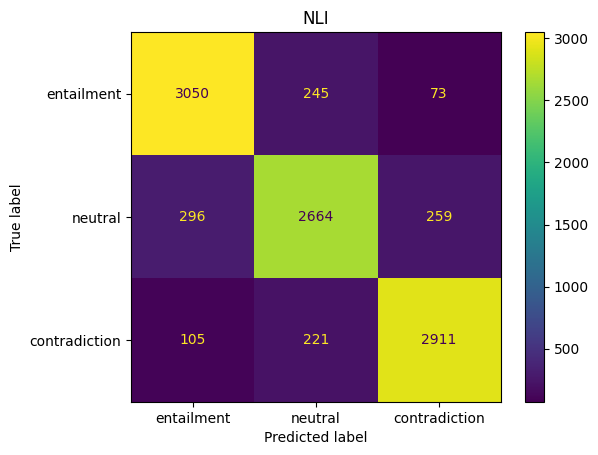

accuracy: 0.8779519543973942


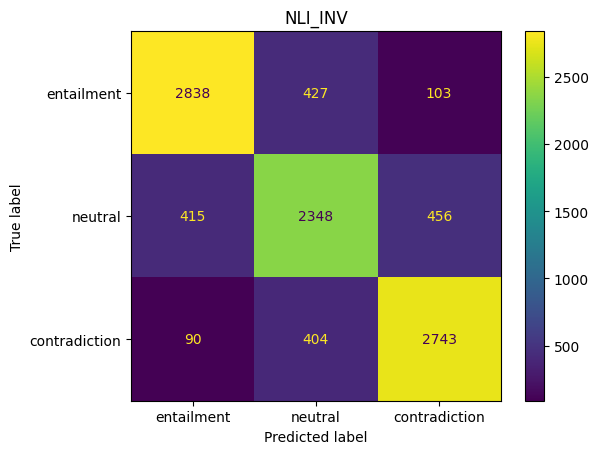

accuracy: 0.8071050488599348


In [ ]:
conf_mat(preds_g_probas_snli,"NLI")
conf_mat(preds_g_probas_snli_inv,"NLI_INV")

Full_probas model

In [ ]:
test_preds_full_probas=torch.load("/content/gdrive/MyDrive/Colab Notebooks/MultiTask_model/test_preds_multimodel_full_probas")



In [ ]:
preds_full_probas_snli=torch.argmax(torch.Tensor(softmax(test_preds_full_probas["snli"].predictions[1],axis=1)),dim=-1)

preds_full_probas_snli_inv=torch.argmax(torch.Tensor(softmax(test_preds_full_probas["snli_inv"].predictions[1],axis=1)),dim=-1)


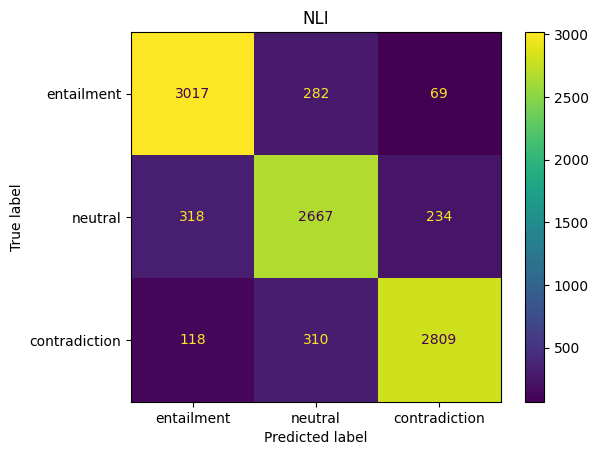

accuracy: 0.8645154723127035


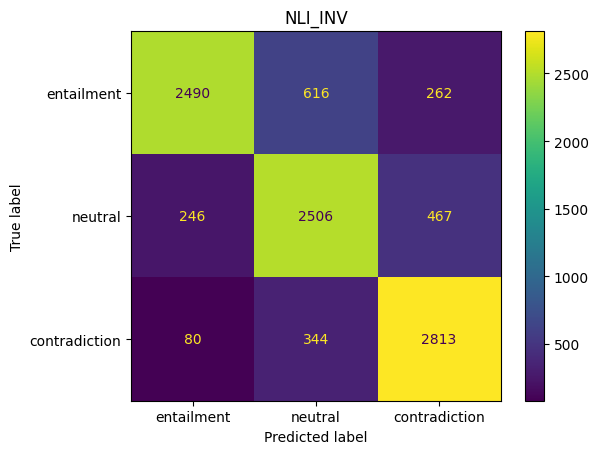

accuracy: 0.7948900651465798


In [ ]:
conf_mat(preds_full_probas_snli,"NLI")
conf_mat(preds_full_probas_snli_inv,"NLI_INV")

Bert model

In [ ]:
test_preds_bert=torch.load("/content/gdrive/MyDrive/Colab Notebooks/MultiTask_model/test_preds_multimodel_bert")


In [ ]:
preds_bert_snli=torch.argmax(torch.Tensor(softmax(test_preds_bert["snli"].predictions[1],axis=1)),dim=-1)

preds_bert_snli_inv=torch.argmax(torch.Tensor(softmax(test_preds_bert["snli_inv"].predictions[1],axis=1)),dim=-1)


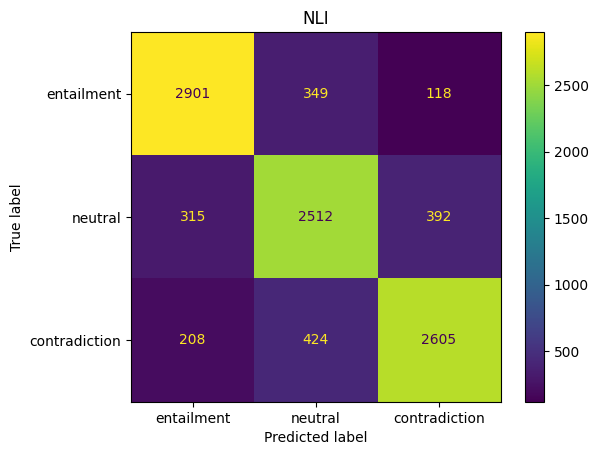

accuracy: 0.8161644951140065


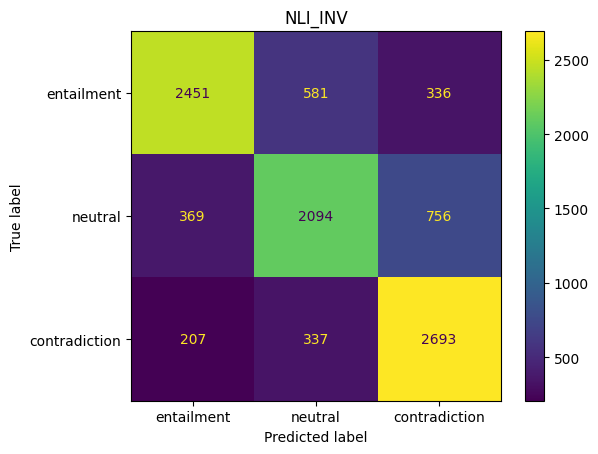

accuracy: 0.7367671009771987


In [ ]:
conf_mat(preds_bert_snli,"NLI")
conf_mat(preds_bert_snli_inv,"NLI_INV")

Multi-lingual BERT model

In [ ]:
test_preds_multibert=torch.load("/content/gdrive/MyDrive/Colab Notebooks/MultiTask_model/test_preds_multimodel_multibert")


In [ ]:
preds_multibert_snli=torch.argmax(torch.Tensor(softmax(test_preds_multibert["snli"].predictions[1],axis=1)),dim=-1)

preds_multibert_snli_inv=torch.argmax(torch.Tensor(softmax(test_preds_multibert["snli_inv"].predictions[1],axis=1)),dim=-1)


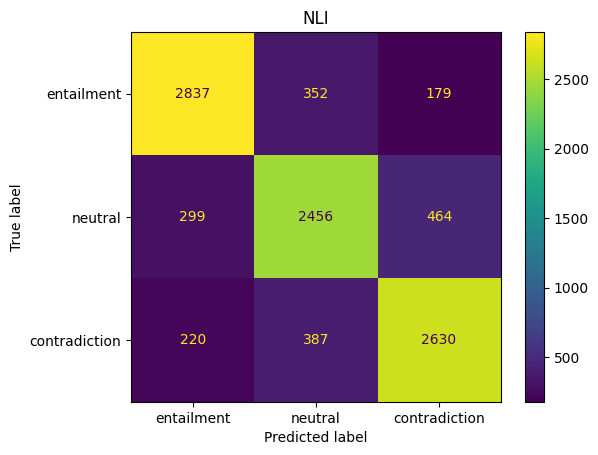

accuracy: 0.8064942996742671


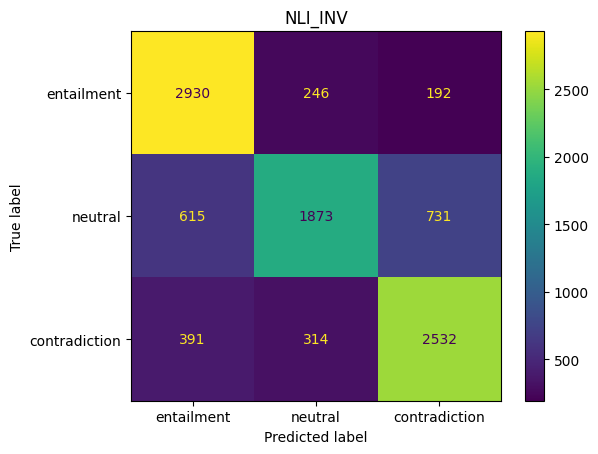

accuracy: 0.7466408794788274


In [ ]:
conf_mat(preds_multibert_snli,"NLI")
conf_mat(preds_multibert_snli_inv,"NLI_INV")

RoBERTa model

In [ ]:
test_preds_roberta=torch.load("/content/gdrive/MyDrive/Colab Notebooks/MultiTask_model/test_preds_multimodel_roberta")


In [ ]:
preds_roberta_snli=torch.argmax(torch.Tensor(softmax(test_preds_roberta["snli"].predictions[1],axis=1)),dim=-1)

preds_roberta_snli_inv=torch.argmax(torch.Tensor(softmax(test_preds_roberta["snli_inv"].predictions[1],axis=1)),dim=-1)


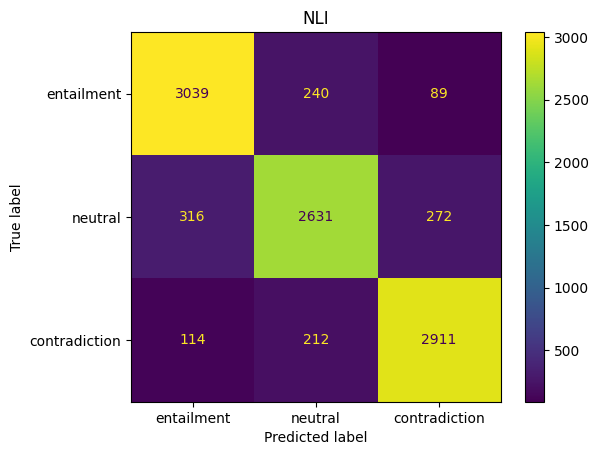

accuracy: 0.8734731270358306


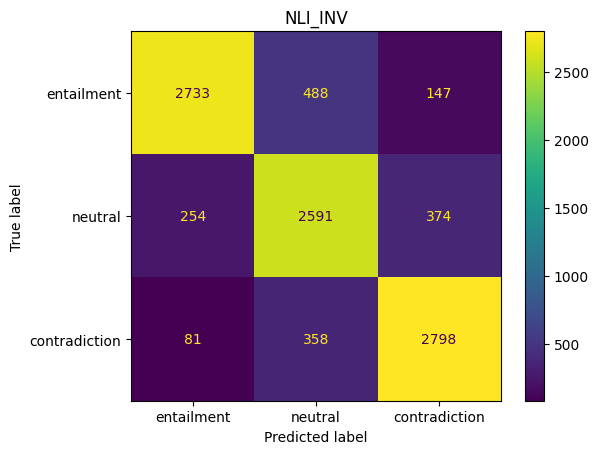

accuracy: 0.8267508143322475


In [ ]:
conf_mat(preds_roberta_snli,"NLI")
conf_mat(preds_roberta_snli_inv,"NLI_INV")

Random predictions to observe that just a random approach cannot be efficient for this task

In [ ]:
from random import randint

In [ ]:
randomlist1=[]
randomlist2=[]
for i in range(len(test_data)):
  randomlist1.append(randint(0,2))
  randomlist2.append(randint(0,2))

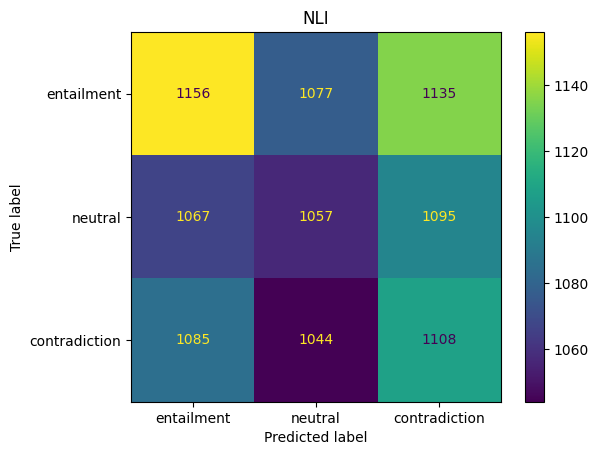

accuracy: 0.338049674267101


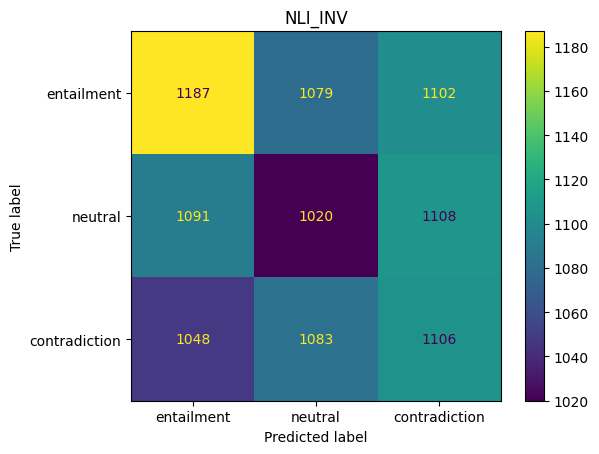

accuracy: 0.33723534201954397


In [ ]:
conf_mat(randomlist1,"NLI")
conf_mat(randomlist2,"NLI_INV")